In [84]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.io import wavfile

In [85]:
def dft(x, N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x[:N])
    return X

[3.5695000551640987, 10.639099986292422, 38.18819997832179, 147.86829997319728, 617.9998000152409, 2705.6470999959856, 10231.342100072652] [0.05419994704425335, 0.06019999273121357, 0.1865000231191516, 0.1436000457033515, 0.21970004308968782, 0.18690002616494894, 0.28330006171017885]


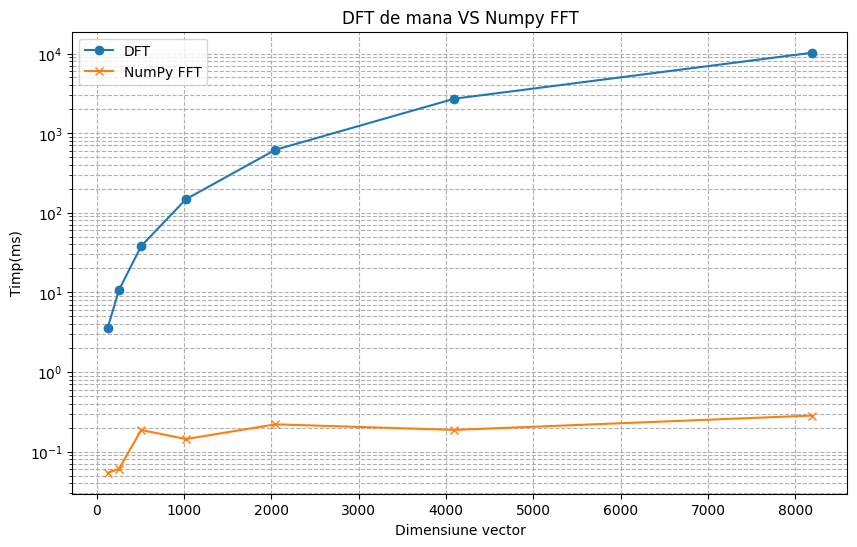

In [86]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]

dft_times = []
fft_times = []


for n in N:
    x = np.random.random(n)  

    start_time = time.perf_counter()
    dft_v = dft(x, n)
    dft_times.append((time.perf_counter() - start_time) * 1000.0)

    start_time = time.perf_counter()
    np_fft = np.fft.fft(x)
    fft_times.append((time.perf_counter() - start_time) * 1000.0)

print(dft_times, fft_times)

plt.figure(figsize=(10, 6))
plt.plot(N, dft_times, label='DFT', marker='o')
plt.plot(N, fft_times, label='NumPy FFT', marker='x')

plt.yscale('log')

plt.xlabel('Dimensiune vector')
plt.ylabel('Timp(ms)')
plt.title('DFT de mana VS Numpy FFT')
plt.legend()

plt.grid(True, which="both", ls="--")

plt.show()


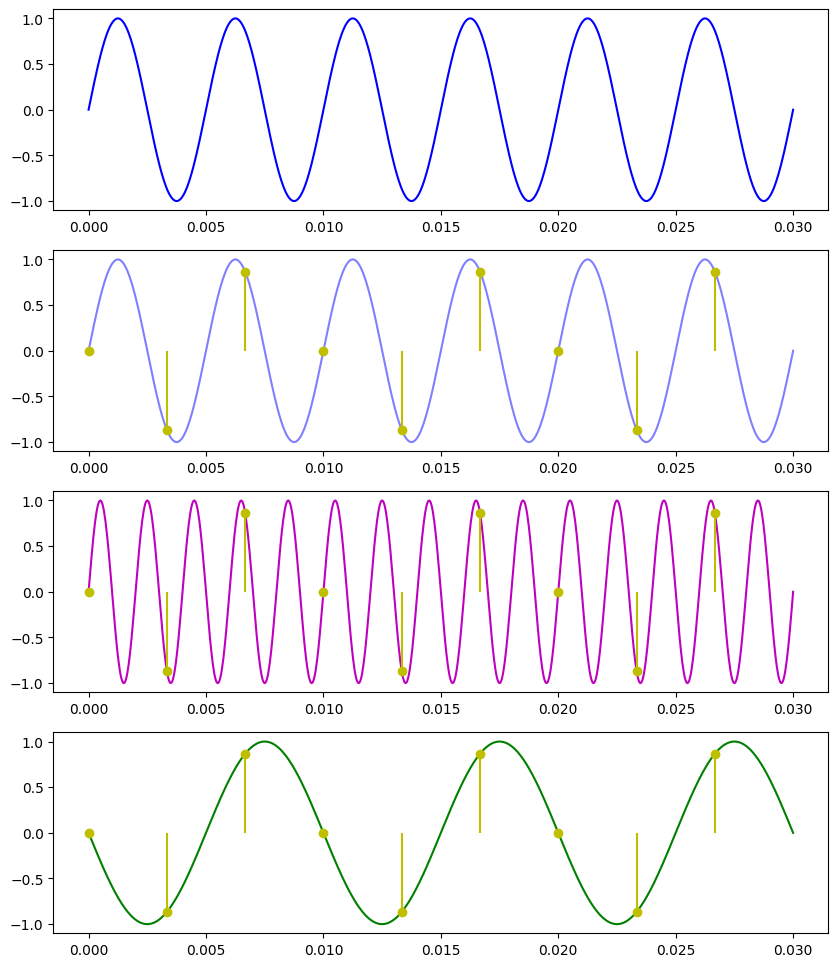

In [87]:
f = 200  
t = np.linspace(0, 0.03, 1000)  
y = np.sin(2 * np.pi * f * t)  

fs = 300  
ts = np.arange(0, 0.03, 1/fs)  
ys = np.sin(2 * np.pi * f * ts)  


f1 = f + fs
f2 = f - fs
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)


fig, ax = plt.subplots(4,1,figsize=(10,12))

ax[0].plot(t, y, 'b')

ax[1].plot(t, y, 'b', alpha=0.5)
ax[1].stem(ts, ys, 'y', basefmt=" ")

ax[2].plot(t, y1, 'm')
ax[2].stem(ts, np.sin(2 * np.pi * f1 * ts), 'y', basefmt=" ")
ax[3].plot(t, y2, 'g')
ax[3].stem(ts, np.sin(2 * np.pi * f2 * ts), 'y', basefmt=" ")

plt.show()

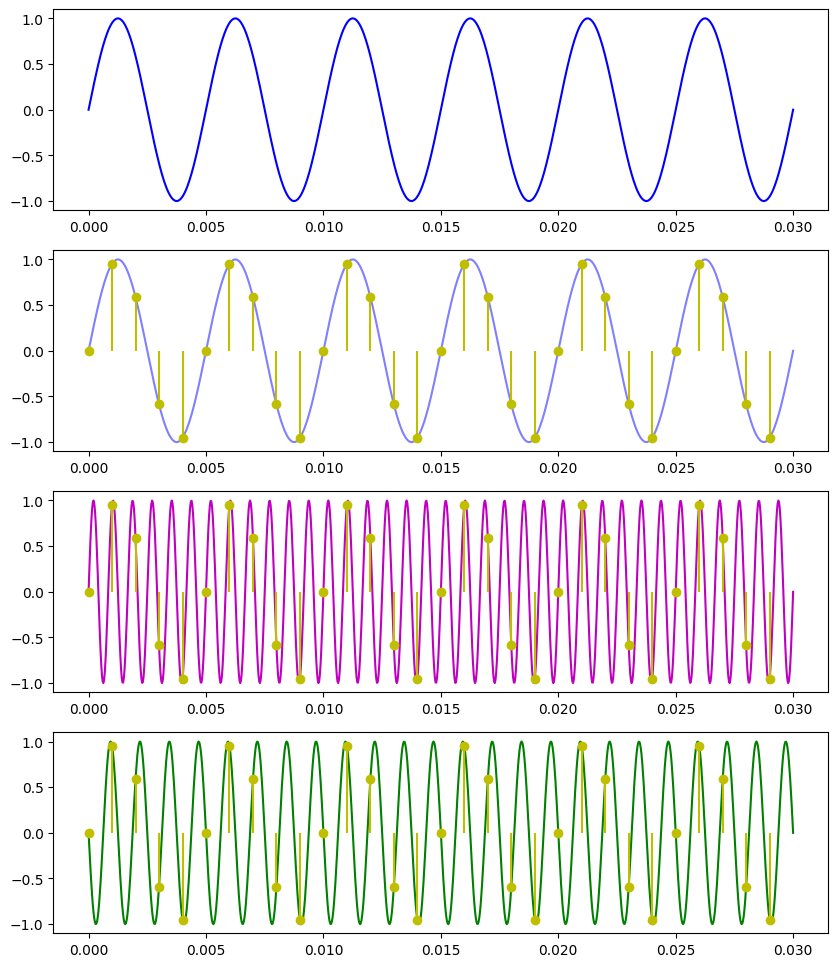

In [88]:
f = 200  
t = np.linspace(0, 0.03, 1000)  
y = np.sin(2 * np.pi * f * t)  

fs = 1000 
ts = np.arange(0, 0.03, 1/fs)  
ys = np.sin(2 * np.pi * f * ts)  

f1 = f + fs
f2 = f - fs
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)


fig, ax = plt.subplots(4,1,figsize=(10,12))

ax[0].plot(t, y, 'b')

ax[1].plot(t, y, 'b', alpha=0.5)
ax[1].stem(ts, ys, 'y', basefmt=" ")

ax[2].plot(t, y1, 'm')
ax[2].stem(ts, np.sin(2 * np.pi * f1 * ts), 'y', basefmt=" ")
ax[3].plot(t, y2, 'g')
ax[3].stem(ts, np.sin(2 * np.pi * f2 * ts), 'y', basefmt=" ")

plt.show()

## Exercitiul 4

$f_{s}$ - frecventa minima de esantionare

B - frecventa maxima

$f_{s} > 2*B$

frecventele emise de un contrabas - intre $40\mathrm{~Hz}$ si $200\mathrm{~Hz}$ => B = 200Hz
=> $f_{s} > 2*200$ => $f_{s} > $400\mathrm{~Hz}$ => frecventa minima de esantionare $400\mathrm{~Hz}$


## Exercitiul 5
Nu vad o diferenta considerabila, daca mi s-ar prezenta o spectograma cu vocalel rostite intr-o ordine random nu as stii sa le disting.

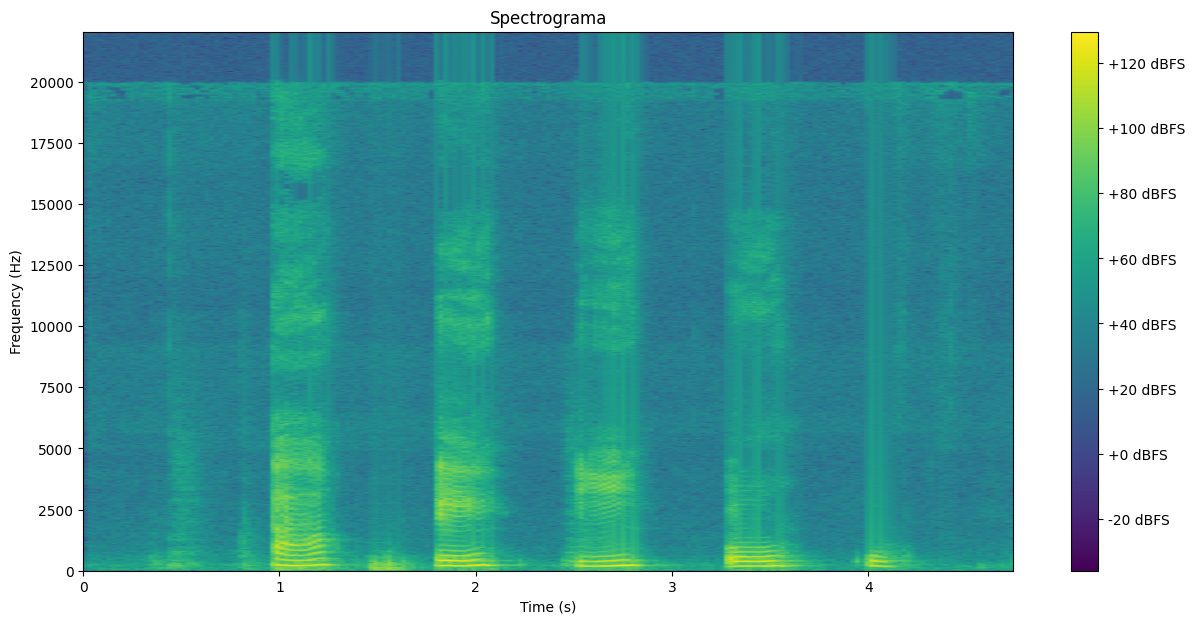

In [89]:
rate, signal = wavfile.read('aeiou3.wav')

group = int(0.01 * len(signal))  
overlap = int(0.5 * group)       
step_size = group - overlap

spectrogram = []
signal_len = len(signal)
num_frames = int(np.ceil(float(np.abs(signal_len - group)) / step_size))

pad_signal_len = num_frames * step_size + group
z = np.zeros((pad_signal_len - signal_len))
padded_signal = np.append(signal, z)

for i in range(0, num_frames * step_size, step_size):
    frame = padded_signal[i:i + group] * np.hamming(group)
    fft_frame = np.fft.rfft(frame)
    spectrogram.append(np.abs(fft_frame))

spectrogram_matrix = np.array(spectrogram).T

plt.figure(figsize=(15, 7))
plt.imshow(20 * np.log10(spectrogram_matrix + 1e-10), aspect='auto', origin='lower', extent=[0, signal_len / rate, 0, rate / 2])
plt.colorbar(format='%+2.0f dBFS')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrograma')
plt.show()

## Exercitiul 7

$SNR_{dB}$ =  $80\mathrm{~dB}$

$P_{semnal}$ = $90\mathrm{~dB}$

##### Rezolvare:

SNR =  $\frac{P_{semnal}}{P_{zgomot}}$

$SNR_{dB}$ =  $10\mathrm{~lg} SNR$

$SNR_{dB}$ =  $10\mathrm{~lg} \frac{P_{semnal}}{P_{zgomot}}$

$\frac{P_{semnal}}{P_{zgomot}} = 10^{\frac{SNR_{db}}{10}}$

$P_{zgomot} = 90\mathrm{~dB} * 10^{-8}$

$P_{zgomot} = 10^{\frac{90}{10}} * 10^{-8}$

$P_{zgomot} = 10$

$P_{zgomot} = 10\mathrm{~lg}10\mathrm{~dB}$

$P_{zgomot} = 10\mathrm{~dB}$